<a href="https://colab.research.google.com/github/sk8980/sk8980/blob/main/LabAnalysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As in other assignments, run this first code block to import necessary libraries

In [9]:
# necessary libraries
import numpy as np
import matplotlib.pyplot as plt


#Create your data array

Create a spreadsheet (use google sheets, ms excel, whatever you want) duplicating the table in your lab book. Include a header row. Save the spreadsheet in tab delimited text format as lab3data.txt (Also save a copy in the native format - e.g. .xlsx for excel). If you use google sheets, download a "tab separated value" file then change the ".tsv" extension to ".txt"

**Make sure you use a consistent unit for the energy** IE if the energy change is 2.14 mJ, you could either enter .00214 (units are Joules) or 2.14 (units are mJ) but use the same choice throughout. 

Upload this spreadsheet to your lab3-data-repository (https://github.com/NYUExperimentalPhysics1-2021/lab3-data-repository-yourgithubname) archive on github

Then change the line that starts !wget to use the correct repository name

When you run this, you should see your data displayed

In [10]:
!wget -nc https://raw.githubusercontent.com/NYUExperimentalPhysics1-2021/lab3-data-repository-sk8980/main/lab333.txt
#!more lab3data.txt

File ‘lab333.txt’ already there; not retrieving.



#Load the data

The load command below assumes you created the 11 columns listed in the lab handout in the order specified,  that the data file is named "lab3data.txt" and that there is one header row.  If that's not right, edit the line below to make it align with what you did. 

In [11]:
phase, duration, avgnrg, numhalfcycles, elapsedtime, lifetime_s, lifetime_asq, deltanrg, coilnrg, nrgloss,coiladj  = np.loadtxt('lab333.txt', skiprows = 1, unpack=True)

# Make a scatter plot of calculated coil energy vs calculated mechanical energy and fit the data to a line

the total electical energy the pico calculated is stored in `coilnrg`

the change in the bob's energy is stored in `deltanrg`

the calculated energy lost to damping is stored in `nrgloss`

the mechanical energy imparted to the bob is the change in the bob's energy + the energy lost due to damping (for exaample, if you were putting in exactly what was needed to overcome damping, then the bob's energy change would be 0)

1. Please make a scatter plot with the calculated electrical energy on the x-axis and the calculated energy imparted to the bob on the y-axis. Use blue dots. Don't connect the lines. Label the axes. Make sure you specify whether energy is in Joules or milliJoules, etc. 

Now we'd like to know if there's a simple scaling relation between the calculated electrical and mechanical energies. IE mechanical = a * electrical, where maybe a = 80%. 

`np.polyfit(x,y,1)` will fit the data to a line, but the intercept won't necessarily be through 0. Here physics tells us that if the electrical energy is 0, the mechanical energy added must also be 0. So we need to fit the line $y = a x$, not $y = a x + b$. Fortunately, this is a straightfoward problem. The least-squares solution is

$a = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

2. Find the best (least-squares) fit for the scaling factor. Draw a black dashed line matching this fit through the data. Title the plot with the scaling factor.


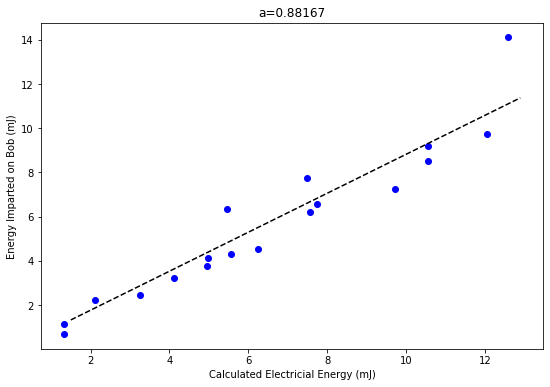

In [12]:
## your answer here
a = (np.dot(coilnrg, nrgloss + deltanrg)/ np.dot(coilnrg,coilnrg)) #best fit slope
x = np.linspace(1.5,12.9,100)
plt.plot
plt.figure(1, figsize = (9,6) )
plt.plot(coilnrg, nrgloss + deltanrg,  'bo')
plt.plot(x, a*x,  'k--')
plt.xlabel("Calculated Electricial Energy (mJ)")
plt.ylabel("Energy Imparted on Bob (mJ)")
plt.title('a={:.5f}'.format(a))
plt.show()

#Make a scatter plot of calculated coil energy per $\frac{1}{2}$ cycle vs calculated mechanical energy per $\frac{1}{2}$ and fit the data to a line

the same as above, but this time divide all the energies by the number of half cycles (this is the same as the number of pulses).


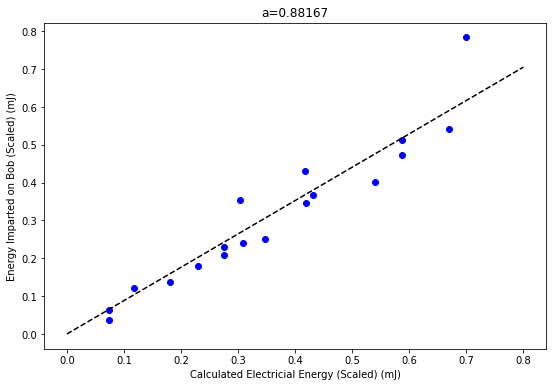

In [13]:
## your answer here

x_2 = coilnrg / np.size (numhalfcycles)
y_2 = (nrgloss + deltanrg)/np.size (numhalfcycles)
a_2 = np.dot(x_2,y_2)/np.dot(x_2,x_2)
x_2_2 = np.linspace(0,0.8,100)
plt.plot
plt.figure(1, figsize = (9,6) )
plt.plot(x_2,y_2,  'bo')
plt.plot(x_2_2, a_2*x_2_2,  'k--')
plt.xlabel("Calculated Electricial Energy (Scaled) (mJ)")
plt.ylabel("Energy Imparted on Bob (Scaled) (mJ)")
plt.title('a={:.5f}'.format(a_2))
plt.show()

#Look for systematics

If everything is going well, we wouldn't expect the scaling to depend on things like the size of the pulse or what fraction of the energy is lost to damping. 

1. remake the scatter plot above (per half cycle), including the fit line, but this time use a blue marker if the per energy pulse is above the median (top half) and a red marker if the per energy pulse is below he median (bottom half)

2. Make a new figure. remake the scatter plot above (per half cycle), including the fit line, but this time use a blue marker if the ratio of energy loss to total energy change is above the median (top half) and a red marker if the per energy pulse is below he median (bottom half)

hint: [you can use true/false arrays to index another array](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-or-mask-index-arrays) For instance if x and y are numpy arrays of the same size, `y[x<10]` gives you all values of `y` for which `x < 10`.



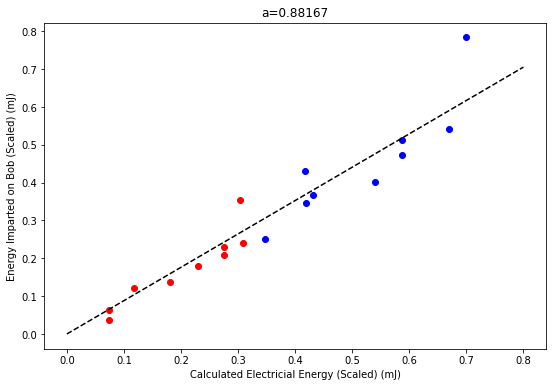

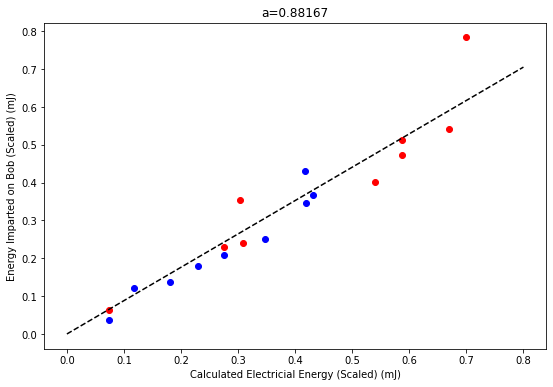

In [16]:
## your code here
z = nrgloss /np.size (numhalfcycles)
z_2 = deltanrg / np.size (numhalfcycles)
a = x_2 > np.median(x_2)
b = x_2 < np.median(x_2)
plt.plot
plt.figure(1, figsize = (9,6) )
plt.plot(x_2[a],y_2[a],  'bo')
plt.plot(x_2[b],y_2[b],  'ro')
plt.plot(x_2_2, a_2*x_2_2,  'k--')
plt.xlabel("Calculated Electricial Energy (Scaled) (mJ)")
plt.ylabel("Energy Imparted on Bob (Scaled) (mJ)")
plt.title('a={:.5f}'.format(a_2))
plt.show()

c = (z / x_2 ) > np.median (z/x_2) 
d = (z / x_2 ) < np.median (z/x_2) 
plt.plot
plt.figure(1, figsize = (9,6) )
plt.plot(x_2[c],y_2[c],  'bo')
plt.plot(x_2[d],y_2[d],  'ro')
plt.plot(x_2_2, a_2*x_2_2,  'k--')
plt.xlabel("Calculated Electricial Energy (Scaled) (mJ)")
plt.ylabel("Energy Imparted on Bob (Scaled) (mJ)")
plt.title('a={:.5f}'.format(a_2))
plt.show()


## Question - answer below

Is there a pattern to either of these scatter plots? Is one data type consistently above the fit line and the other below it, or are they all spread out?

There is a clear pattern in the second graph, in that the ratio of energy loss to total energy typically falls below the fit line when it is above the median, however in that same graph the red points do not follow a similiar pattern.
The lack of pattern for ech data points is actually consistent with theory in that the scaling should not depedning on attributes such as the size of the pulse or the ratio between energy loss to total energy.


#Plot the residuals

Make the scatter plot per half cycle again, but this time subtract the linear fit from the y-data. So you should have a plot of $(x, y-ax)$ where $x$ is the calculated electrical energy, $y$ is the calculated mechanical energy added, and $a$ is the best-fit scaling factor

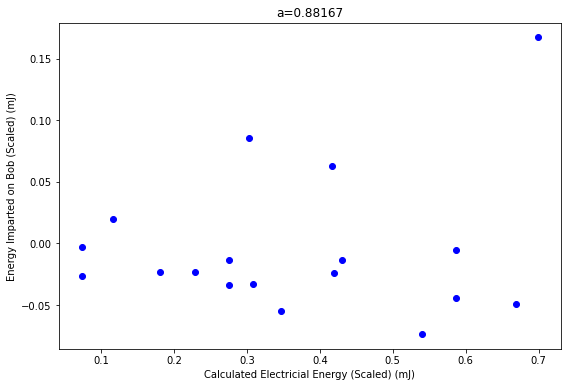

In [ ]:
## your code here
plt.plot
plt.figure(1, figsize = (9,6) )
plt.plot(x_2,y_2 - a_2*x_2,  'bo')
plt.xlabel("Calculated Electricial Energy (Scaled) (mJ)")
plt.ylabel("Energy Imparted on Bob (Scaled) (mJ)")
plt.title('a={:.5f}'.format(a_2))
plt.show()

#Make a histogram of fractional error

1. Make a histogram of the fractional error: $\frac{y - ax}{y}$, where $x$ is the calculated electrical energy, $y$ is the calculated mechanical energy added, and $a$ is the best-fit scaling factor

2. Calculate the root mean square fractional error (that is $\sqrt{\frac{1}{N}\sum_i (\frac{y_i - ax_i}{y_i})^2}$. Why did I tell you to use this instead of the standard deviation? What's the difference?

This formula accounts for an additional term of the y value within each fractioanl error term. This is better than using standard deviation sinch each term is scaled by the numerical value of the Energy imparted on Bob. Also this measures that deviation to the best fit line better than the standard deviation formula could.

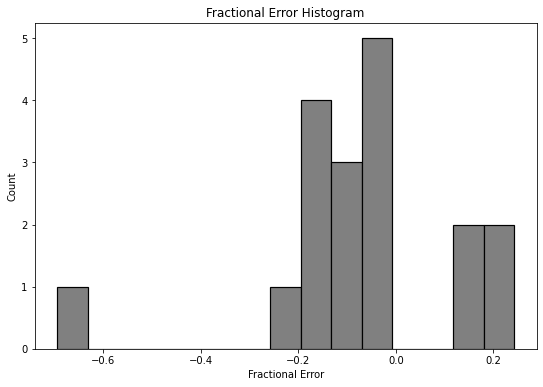

Root Mean Squared =0.21506


In [37]:
##your answer here
a6 = 0.88167
plt.figure (1, figsize = (9,6))
plt.hist((((nrgloss+deltanrg)- a6*coilnrg)/ (nrgloss+deltanrg)), 15, density=False , facecolor='gray', align='mid',edgecolor='black', linewidth=1.2)
plt.ylabel("Count")
plt.xlabel("Fractional Error")
plt.title('Fractional Error Histogram')


plt.show()
rms = np.sqrt((np.sum((((nrgloss+deltanrg)- a6*coilnrg)/ (nrgloss+deltanrg))**2))/np.size(coilnrg))
print('Root Mean Squared ={:.5f}'.format(rms))


# Analysis

1. Can the electrical energy be used to measure the mechanical energy imparted to the bob?

Yes, when graphed a plot of electrical energy on the x axis and mechincal energy on the y energy, data analysis shows a strong, and positive linear relationship with a slope with 0.88167. Indicating that electrical energy can be utilized to determine the mechanical energy on the bob.

2. How accurately do you think we can estimate the amount of energy added? What limits this accuracy?

The ammount of energy added is the sum of the energy lossed due to damping and the change in bob's energy. Theoritically the size of the per energy pulse should not effect the scaling of our model of fit line, however our experiment that the corelatin between elctrical energy and energy imparted on bob becomes less clear as per energy pulse increases, which means that we could only somewhat accuratly estimate the energy to the median energy pulse of 0.328 mJ per pulse.

3. Do you see any evidence of systematic errors? If so, what do you see? What might you do to correct these? 

As the answer to the last question states the corelation becomes unclear when the data is above the data point median the corelation becomes unclear. We could correct this by adjusting the pulse phase and duration for each data set measurement so that it does not exceed the median energy pulse of 0.328 mJ before we take each measurement.